In [2]:
%matplotlib notebook
import numpy as np
from matplotlib import pyplot as plt
import re
from nltk.metrics import *
from collections import Counter
from ipywidgets import *
import matplotlib.pyplot as plt
import codecs
import nltk
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd
import random
from sklearn.feature_extraction.text import HashingVectorizer

# Finding Similar Items

## 3.1 Applications of Near-Neighbor Search

## 3.1.1 Jaccard Similarity of Sets

$Jaccard\ Similarity = \frac{|A\cap B|}{|A\cup B|}$

In [4]:
def jaccard_sim(a, b):
    
    return len(a.intersection(b)) / len(a.union(b))

In [5]:
a = set([1, 2, 3, 4, 5])
b = set([3, 4, 7, 8])

a_intersection_b = a.intersection(b)
a_union_b = a.union(b)

print("Intersection: {0}\nUnion: {1}\nJaccard Similarity = {2}".format(a_intersection_b, 
                                                                       a_union_b,
                                                                       jaccard_sim(a, b)))

Intersection: {3, 4}
Union: {1, 2, 3, 4, 5, 7, 8}
Jaccard Similarity = 0.2857142857142857


In [12]:
# nltk
print("Jaccard Distance: {0}\nJaccard Similarity: {1}".format(\
                                                              jaccard_distance(a, b), 
                                                              jaccard_sim(a, b)))

Jaccard distance: 0.7142857142857143
Jaccard Similarity: 0.2857142857142857


### 3.1.2 Similarity of Documents

### 3.1.3 Collaborative Filtering as a Similar-Sets Problem

In [16]:
# explicar
def jaccard_bag_sim(a, b):
    
    intersection_sum = sum((a & b).values())
    union_sum = sum(a.values()) + sum(b.values())
    
    return intersection_sum / union_sum

In [17]:
a = Counter('aaab')
b = Counter('aabbc')

print("Jaccard Bag Similarity: {}".format(jaccard_bag_sim(a, b)))

Jaccard Bag Similarity: 0.3333333333333333


## 3.2 Shingling of Documents

### 3.2.1 k-Shingles

In [22]:
# character ngram
s = "Hello World"

print(list(ngrams(s, 2)))
print([''.join(i) for i in ngrams(s, 3)])

[('H', 'e'), ('e', 'l'), ('l', 'l'), ('l', 'o'), ('o', ' '), (' ', 'W'), ('W', 'o'), ('o', 'r'), ('r', 'l'), ('l', 'd')]
['Hel', 'ell', 'llo', 'lo ', 'o W', ' Wo', 'Wor', 'orl', 'rld']


In [25]:
# string ngram
s = "A disciplina Garimpagem de Dados possui 4 créditos"

print(list(ngrams(s.split(), 2)))
print([' '.join(i) for i in ngrams(s.split(), 3)])

[('A', 'disciplina'), ('disciplina', 'Garimpagem'), ('Garimpagem', 'de'), ('de', 'Dados'), ('Dados', 'possui'), ('possui', '4'), ('4', 'créditos')]
['A disciplina Garimpagem', 'disciplina Garimpagem de', 'Garimpagem de Dados', 'de Dados possui', 'Dados possui 4', 'possui 4 créditos']


In [193]:
%run -i books.py

In [194]:
dom_casmurro[35:37]

['O meu fim evidente era atar as duas pontas da vida, e restaurar na velhice a adolescência.',
 'Pois, senhor, não consegui recompor o que foi nem o que fui.']

In [195]:
perto_coracao[55:57]

['O homenzinho era uma pérola de bom, uma  pérola de gravata, tinha a voz grossa e dizia de dentro do bolso: "Majestade Joana, podeis me  escutardes um minuto, só um minuto podereis interromperdes vossa sempre ocupação?"',
 'E  declarava depois: "Sou vosso servo, princesa.']

In [196]:
cv = CountVectorizer(analyzer='word', # n-gram de words
                     ngram_range=(2, 2)) # 2-gram

cv.fit(dom_casmurro + perto_coracao)

print("Tamanho do vocabulário: {}".format(len(cv.vocabulary_)))

Tamanho do vocabulário: 62136


In [197]:
line = dom_casmurro[35:36]
cv_bigrams = cv.transform(line)
df_cv_bigrams = pd.DataFrame(cv_bigrams.todense(), columns=cv.get_feature_names(), index=['count']).T

print("Linha:\n{}".format(line))
df_cv_bigrams[df_cv_bigrams['count'] > 0]

Linha:
['O meu fim evidente era atar as duas pontas da vida, e restaurar na velhice a adolescência.']


,count
as duas,1
atar as,1
da vida,1
duas pontas,1
era atar,1
evidente era,1
fim evidente,1
meu fim,1
na velhice,1
pontas da,1


In [198]:
from sklearn.neighbors import KNeighborsClassifier
from scipy import sparse
import numpy as np

In [199]:
X_dom_casmurro = cv.transform(dom_casmurro)
y_dom_casmurro = np.zeros((X_dom_casmurro.shape[0], 1))
X_perto_coracao = cv.transform(perto_coracao)
y_perto_coracao = np.ones((X_perto_coracao.shape[0], 1))

X = sparse.vstack((X_dom_casmurro, X_perto_coracao))
y = np.vstack((y_dom_casmurro, y_perto_coracao)).ravel()

knn = KNeighborsClassifier().fit(X, y)

In [200]:
knn.predict_proba(cv.transform(["A menina do meio do coração"]))

array([[ 0.6,  0.4]])

In [201]:
from sklearn.metrics import accuracy_score

accuracy_score(y, knn.predict(X))

0.6652392947103275

In [202]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [203]:
tfidf = TfidfVectorizer(analyzer='word', # n-gram de words
                        stop_words = nltk.corpus.stopwords.words("portuguese")) # desconsiderar stop words

tfidf.fit(dom_casmurro + perto_coracao)

print("Tamanho do vocabulário: {}".format(len(tfidf.vocabulary_)))

Tamanho do vocabulário: 12472


In [204]:
X_dom_casmurro = tfidf.transform(dom_casmurro)
y_dom_casmurro = np.zeros((X_dom_casmurro.shape[0], 1))
X_perto_coracao = tfidf.transform(perto_coracao)
y_perto_coracao = np.ones((X_perto_coracao.shape[0], 1))

X = sparse.vstack((X_dom_casmurro, X_perto_coracao))
y = np.vstack((y_dom_casmurro, y_perto_coracao)).ravel()

knn_tfidf = KNeighborsClassifier().fit(X, y)

In [205]:
accuracy_score(y, knn_tfidf.predict(X))

0.70843828715365242

In [208]:
knn_tfidf.predict_proba(tfidf.transform(["A menina do meio do coração"]))

array([[ 0.6,  0.4]])

In [229]:
sentences = random.choices(dom_casmurro, k=5)
probs = knn_tfidf.predict_proba(tfidf.transform(sentences))

for sentence, prob in zip(sentences, probs):
    
    print("\n\t{0}\n\n\tDom Casmurro: {1} {2} Clarice\n".format(sentence, prob[0], prob[1]))


	Escobar observou-me que os outros e o padre falavam de inveja e propôs-me viver separados.

	Dom Casmurro: 0.6 0.4 Clarice


	O estado dela é gravíssimo, mas não é mal de morte, e Deus pode tudo.

	Dom Casmurro: 0.8 0.2 Clarice


	Não atinava com a razão do escrito, como não atinava com a do falado.

	Dom Casmurro: 0.6 0.4 Clarice


	Se parecesse, elas tratariam de separar-nos mais, e talvez acabassem não me recebendo... Para mim, basta o nosso juramento de que nos havemos de casar um com outro.

	Dom Casmurro: 0.4 0.6 Clarice


	Realmente, era de Marte, mas é claro que só apanhara o som da palavra, não o sentido.

	Dom Casmurro: 0.8 0.2 Clarice



In [230]:
sentences = random.choices(perto_coracao, k=5)
probs = knn_tfidf.predict_proba(tfidf.transform(sentences))

for sentence, prob in zip(sentences, probs):
    
    print("\n\t{0}\n\n\tDom Casmurro: {1} {2} Clarice\n".format(sentence, prob[0], prob[1]))


	— Mesmo essa mulher... essa casa...

	Dom Casmurro: 0.0 1.0 Clarice


	A professora olhou para Joana.

	Dom Casmurro: 0.0 1.0 Clarice


	— Armanda não veio?

	Dom Casmurro: 0.4 0.6 Clarice


	Era assim como quem acaba uma  coisa e diz: acabei, professora.

	Dom Casmurro: 0.6 0.4 Clarice


	Qualquer instante que sucedesse àquele seria  mais baixo e vazio.

	Dom Casmurro: 0.4 0.6 Clarice



### 3.2.2 Choosing the Shingle Size

### 3.2.3 Hashing Shingles

In [233]:
hv = HashingVectorizer(analyzer='word', # n-gram de words
                     ngram_range=(2, 2)) # 2-gram

hv.fit([dom_casmurro, perto_coracao])

HashingVectorizer(analyzer='word', binary=False, decode_error='strict',
         dtype=<class 'numpy.float64'>, encoding='utf-8', input='content',
         lowercase=True, n_features=1048576, ngram_range=(2, 2),
         non_negative=False, norm='l2', preprocessor=None, stop_words=None,
         strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
         tokenizer=None)

In [235]:
hv_bigrams = hv.transform(dom_casmurro)

In [236]:
hv_bigrams

<4102x1048576 sparse matrix of type '<class 'numpy.float64'>'
	with 54563 stored elements in Compressed Sparse Row format>

In [ ]:
hv_bigra

In [14]:
import sys

print("Perto do Coração Selvagem vocabulary size: {0} megabytes".format(sys.getsizeof(perto_coracao) / 10**6))
print("Dom Casmurro size: {0} megabytes".format(sys.getsizeof(dom_casmurro) / 10**6))
print("CountVectorizer vocabulary size: {0} megabytes".format(sys.getsizeof(cv.vocabulary_) / 10**6))

Perto do Coração Selvagem vocabulary size: 0.582302 megabytes
Dom Casmurro size: 0.750664 megabytes
CountVectorizer vocabulary size: 2.621544 megabytes


### 3.2.4 Shingles Built from Words

## 3.3 Similarity-Preserving Summaries of Sets

### 3.3.1 Matrix Representation of Sets

In [15]:
from sklearn.feature_extraction import DictVectorizer

In [16]:
dv = DictVectorizer(sparse=False)

D = [{'a':1, 'd':1}, {'c': 1}, {'b': 1, 'd': 1, 'e': 1}, {'a': 1, 'c': 1, 'd': 1}]

X = dv.fit_transform(D)
X # diferente da notação no livro, os conjuntos ficam representados por linhas, e não colunas

array([[ 1.,  0.,  0.,  1.,  0.],
       [ 0.,  0.,  1.,  0.,  0.],
       [ 0.,  1.,  0.,  1.,  1.],
       [ 1.,  0.,  1.,  1.,  0.]])

In [17]:
dv.inverse_transform(X)

[{'a': 1.0, 'd': 1.0},
 {'c': 1.0},
 {'b': 1.0, 'd': 1.0, 'e': 1.0},
 {'a': 1.0, 'c': 1.0, 'd': 1.0}]

### 3.3.2 Minhashing

Ver: http://mccormickml.com/2015/06/12/minhash-tutorial-with-python-code/

### 3.3.3 Minhashing and Jaccard Similarity

### 3.3.4 Minhash Signatures

### 3.3.5 Computing Minhash Signatures

## 3.4 Locality-Sensitive Hashing for Documents

### 3.4.1 LSH for Minhash Signatures

### 3.4.2 Analysis of the Banding Technique

### 3.4.3 Combining the Technique

## 3.5 Distance Measures

In [3]:
from sklearn.neighbors import DistanceMetric

<img src="images/sklearn_0_19_distance_metrics.png" />

### 3.5.1 Definition of a Distance Measure

### 3.5.2 Euclidean Distances

<IPython.core.display.Javascript object>


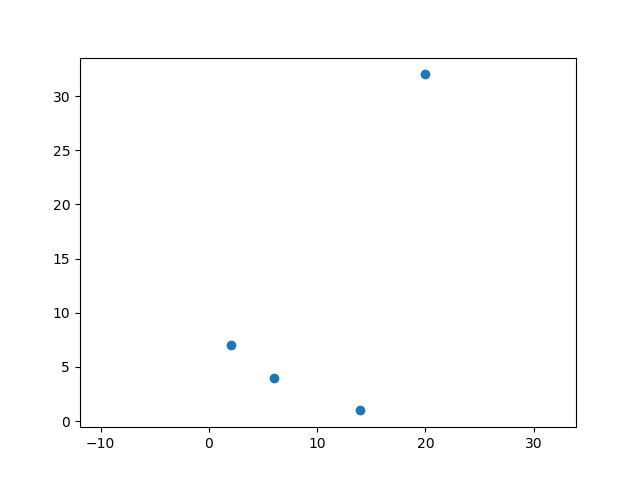

In [74]:
points = np.array([
    [2, 7],
    [6, 4],
    [14, 1],
    [20, 32]
])
points_as_str = [str(p) for p in points]

fig, ax = plt.subplots(1, 1)
ax.scatter(points[:, 0], points[:, 1])
_ = ax.axis("equal")

$L_2-norm$ ou Euclidian distance<br />
$d([x_1, x_2, ..., x_n], [y_1, y_2, ..., y_n]) = \sqrt{\sum\limits_{i = 1}^n (x_i - y_i)^2}$

In [45]:
euclidean = DistanceMetric.get_metric("euclidean")
pd.DataFrame(euclidean.pairwise(points), 
             columns=points_as_str,
             index=points_as_str)

,"[2, 7]","[6, 4]","[100, 2]","[33, 650]"
"[2, 7]",0.000000,5.000000,98.127468,643.746845
"[6, 4]",5.000000,0.000000,94.021274,646.563995
"[100, 2]",98.127468,94.021274,0.000000,651.454526
"[33, 650]",643.746845,646.563995,651.454526,0.000000


$L_1-norm$ ou Manhattan distance<br />
$d([x_1, x_2, ..., x_n], [y_1, y_2, ..., y_n]) = \sum\limits_{i = 1}^n \vert x_i - y_i\vert$

In [46]:
manhattan = DistanceMetric.get_metric("manhattan")
pd.DataFrame(manhattan.pairwise(points), 
             columns=points_as_str,
             index=points_as_str)

,"[2, 7]","[6, 4]","[100, 2]","[33, 650]"
"[2, 7]",0.0,7.0,103.0,674.0
"[6, 4]",7.0,0.0,96.0,673.0
"[100, 2]",103.0,96.0,0.0,715.0
"[33, 650]",674.0,673.0,715.0,0.0


$L_r-norm$ ou Minkowski distance<br />
$d([x_1, x_2, ..., x_n], [y_1, y_2, ..., y_n]) = (\sum\limits_{i = 1}^n \vert x_i - y_i\vert ^r)^{\frac{1}{r}}$

In [47]:
minkowski = DistanceMetric.get_metric("minkowski", p=5)
pd.DataFrame(minkowski.pairwise(points), 
             columns=points_as_str,
             index=points_as_str)

,"[2, 7]","[6, 4]","[100, 2]","[33, 650]"
"[2, 7]",0.000000,4.174028,98.000007,643.000033
"[6, 4]",4.174028,0.000000,94.000000,646.000016
"[100, 2]",98.000007,94.000000,0.000000,648.001531
"[33, 650]",643.000033,646.000016,648.001531,0.000000


$L_\infty-norm$ ou Chebyshev distance<br />
$d([x_1, x_2, ..., x_n], [y_1, y_2, ..., y_n]) = max_{i = 1}^n(\vert x_i - y_i\vert)$

In [48]:
chebyshev = DistanceMetric.get_metric("chebyshev")
pd.DataFrame(chebyshev.pairwise(points), 
             columns=points_as_str,
             index=points_as_str)

,"[2, 7]","[6, 4]","[100, 2]","[33, 650]"
"[2, 7]",0.0,4.0,98.0,643.0
"[6, 4]",4.0,0.0,94.0,646.0
"[100, 2]",98.0,94.0,0.0,648.0
"[33, 650]",643.0,646.0,648.0,0.0


### 3.5.3 Jaccard Distance

$Jaccard\ Distance = 1 - \frac{|A\cap B|}{|A\cup B|}$

In [57]:
points_bol = [[0, 0, 0, 1],
          [0, 1, 1, 0],
          [1, 0, 1, 1],
          [1, 0, 1, 0]]

points_bol_as_str = [str(p) for p in points_bol]

In [58]:
jaccard = DistanceMetric.get_metric("jaccard")
pd.DataFrame(jaccard.pairwise(points_bol), 
             columns=points_bol_as_str,
             index=points_bol_as_str)

,"[0, 0, 0, 1]","[0, 1, 1, 0]","[1, 0, 1, 1]","[1, 0, 1, 0]"
"[0, 0, 0, 1]",0.000000,1.000000,0.666667,1.000000
"[0, 1, 1, 0]",1.000000,0.000000,0.750000,0.666667
"[1, 0, 1, 1]",0.666667,0.750000,0.000000,0.333333
"[1, 0, 1, 0]",1.000000,0.666667,0.333333,0.000000


### 3.5.4 Cosine Distance

In [56]:
from sklearn.metrics.pairwise import cosine_distances

<IPython.core.display.Javascript object>


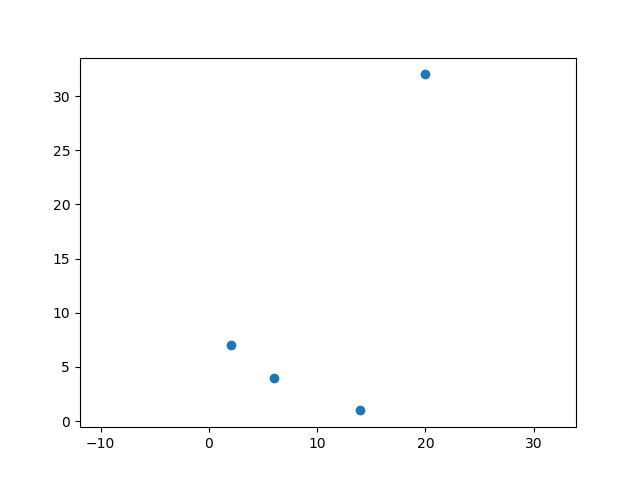

In [75]:
fig, ax = plt.subplots(1, 1)
ax.scatter(points[:, 0], points[:, 1])
_ = ax.axis("equal")

In [76]:
pd.DataFrame(cosine_distances(points), 
             columns=points_as_str,
             index=points_as_str)

,[2 7],[6 4],[14 1],[20 32]
[2 7],0.000000,0.238061,0.657471,0.039027
[6 4],0.238061,0.000000,0.130543,0.088629
[14 1],0.657471,0.130543,0.000000,0.410931
[20 32],0.039027,0.088629,0.410931,0.000000


### 3.5.5 Edit Distance

Edit distance entre duas strings $x$ e $y$ é a menor quantidade de operações de inserção e remoção que aplicadas a $x$ a convertem em $y$.

In [82]:
ss = ['abcde', 'acfdeg', 'abelardo', 'aberlado']

def pairwise_edit_distance(ss):
    
    len_ss = len(ss)
    result = []
    
    for s1 in ss:
        for s2 in ss:
            
            result.append(edit_distance(s1, s2))
            
    return np.array(result).reshape((len_ss, len_ss))

pd.DataFrame(pairwise_edit_distance(ss), 
             columns=ss,
             index=ss)

,abcde,acfdeg,abelardo,aberlado
abcde,0,3,5,5
acfdeg,3,0,7,7
abelardo,5,7,0,2
aberlado,5,7,2,0


### 3.5.6 Hamming Distance

Hamming distance entre dois vetores $x$ e $y$ é calculado como a proporção entre  o número de componentes de $x$ e $y$ que possuem valores diferentes e o tamanho dos vetores.

In [83]:
points = [
    [1, 2, 3, 6],
    [1, 2, 5, 1],
    [4, 2, 5, 9],
    [1, 5, 1, 6]
]

points_as_str = [str(p) for p in points]

hamming = DistanceMetric.get_metric("hamming")
pd.DataFrame(hamming.pairwise(points), 
             columns=points_as_str,
             index=points_as_str)

,"[1, 2, 3, 6]","[1, 2, 5, 1]","[4, 2, 5, 9]","[1, 5, 1, 6]"
"[1, 2, 3, 6]",0.00,0.50,0.75,0.50
"[1, 2, 5, 1]",0.50,0.00,0.50,0.75
"[4, 2, 5, 9]",0.75,0.50,0.00,1.00
"[1, 5, 1, 6]",0.50,0.75,1.00,0.00


# 3.6 The Theory of Locality-Sensitive Functions

Uma forma de encontrar os K itens mais próximos a um determinado item X, KNN(K Nearest Neighbors), é calcular a distância entre X e todos os demais itens do conjunto de itens, selecionando os K itens com menor distância.

A fim de reduzir a quantidade de comparações a serem realizadas, pode-se adicionar uma etapa preliminar de seleção de itens candidatos a serem os K mais próximos: itens cujas distâncias para X sejam menor que um determinado threshold. Para que essa etapa não realize uma comparação de X com todos os itens, uma técnica que pode ser utilizada é:

* aplicar a todos os itens uma função hash certa probabilidade[1] de colocar em mesmos buckets itens próximos(cujas distâncias seja menor que determinado threshold), criando um map de valor hash em itens;
* ao chegar um novo item, aplicar a função hash a ele e então calcular os K itens mais próximos dele comparando-o apenas com os itens que possuem igual valor para a função hash, consultado o map.

[1] - a função hash pode errar de duas formas:

* colocar no mesmo bucket itens que não estão próximos, erro chamado **falso positivo**;
* colocar em buckets distintos itens que são próximos, erro chamado **falso negativo**;

Para tanto, podemos definir que um conjunto de funções $F$ é chamado $(d_1, d_2, p_1, p_2)-sensitive$ se, para quaisquer dois itens $x$ e $y$ e uma função $h\in F$

* se $d(x,y) \le d_1$ então $Pr[h(x) = h(y)] \ge p_1$
* se $d(x,y) \ge d_2$ então $Pr[h(x) = h(y)] \le p_2$

Para que uma função $h$ pertencente a um conjunto de funções $(d_1, d_2, p_1, p_2)-sensitive$ seja utilizada na etapa preliminar do KNN, é interessante que:

* $p_1 \gt p_2$, ou seja, a probabilidade de  colocar dois itens próximos num mesmo bucket é maior que a probabilidade de colocar dois itens distantes num mesmo bucket;
* o uso dessa função seja mais eficiente que a estratégia de comparar um item com todos os demais.

A partir de uma família de funções $F$ $(d_1, d_2, p_1, p_2)-sensitive$ é possível criar novas famílias de funções $F'$ $(d_1, d_2, p_1', p_2')-sensitive$ combinando funções de $F$:

Seja $C$ composto por $n$ funções selecionadas aleatoriamente, com probabilidade uniforme, de $F$:

* $h \in F_{AND}^{n}$ se e somente se $h(x) = h(y) \leftrightarrow \bigwedge\limits_{f \in C}(f(x) = f(y))$ <br />
dado que as funções em $C$ são selecionadas aleatoriamente, podemos calcular $Pr[h(x) = h(y)] = \prod\limits_{f \in C}(Pr[f(x) = f(y)])$; <br />
dado que $Pr[f(x) = f(y)] \ge p_1$, temos que $Pr[h(x) = h(y)] \ge (p_1)^n$ <br />
dado que $Pr[f(x) = f(y)] \le p_2$, temos que $Pr[h(x) = h(y)] \le (p_2)^n$ <br />
logo, $F_{AND}^{n}$ é um conjunto de funções $(d_1, d_2, (p_1)^n, (p_2)^n)-sensitive$.
* $h \in F_{OR}^{n}$ se e somente se $h(x) = h(y) \leftrightarrow \bigvee\limits_{f \in C}(f(x) = f(y))$ <br />
dado que as funções em $C$ são selecionadas aleatoriamente, podemos calcular $Pr[h(x) = h(y)] = 1 - \prod\limits_{f \in C}(1 - Pr[f(x) = f(y)])$[2]; <br />
dado que $Pr[f(x) = f(y)] \ge p_1$, temos que $Pr[h(x) = h(y)] \ge 1 - (1 -p_1)^n$ <br />
dado que $Pr[f(x) = f(y)] \le p_2$, temos que $Pr[h(x) = h(y)] \le 1 - (1 - 
p_2)^n$ <br />
logo, $F_{AND}^{n}$ é um conjunto de funções $(d_1, d_2, 1 - (1 - p_1)^n, 1 - (1 - p_2)^n)-sensitive$.

[2] - essa probabilidade é calculada como o complemento da probabilidade de que todas as funções dêem resultado $h(x) \neq h(y)$.

In [176]:
%run -i lsh_compose.py

<IPython.core.display.Javascript object>


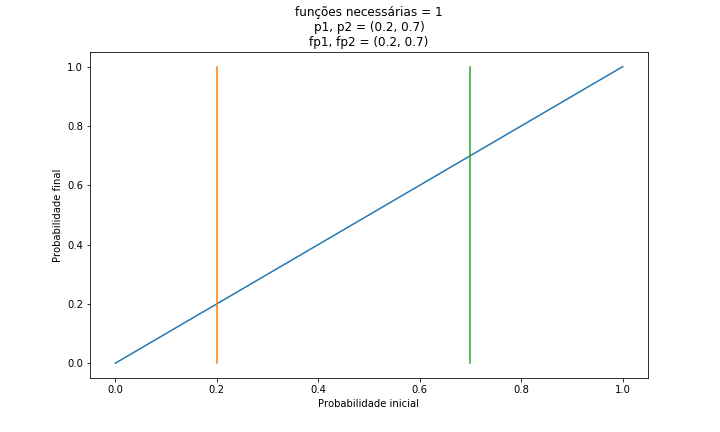

In [189]:
%run -i lsh_plot_1.py

<IPython.core.display.Javascript object>


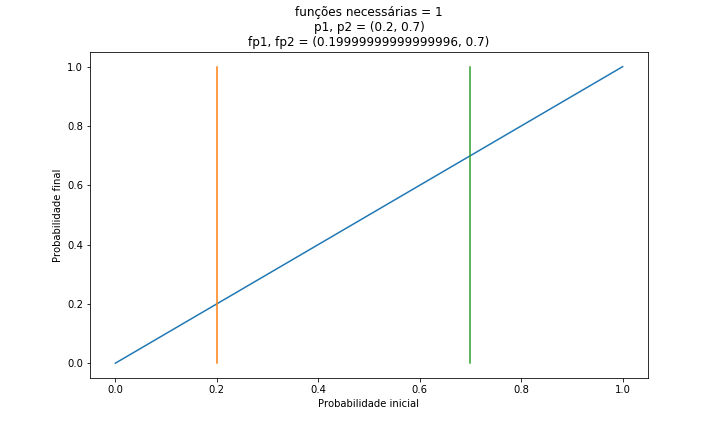

In [190]:
%run -i lsh_plot_2.py

## 3.7 LSH Families for Other Distance Measures

### 3.7.1 LSH Families for Hamming Distance